**Time Series Forecasting with XGBoost:**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb

In [34]:
from sklearn.metrics import mean_squared_error

In [10]:
df = pd.read_csv(r"C:\Users\blais\Documents\ML\data\kaggle\PJME_hourly.csv")
df = df.set_index("Datetime")
df.index = pd.to_datetime(df.index)

In [11]:
df.head()

,PJME_MW
Datetime,
2002-12-31 01:00:00,26498.0
2002-12-31 02:00:00,25147.0
2002-12-31 03:00:00,24574.0
2002-12-31 04:00:00,24393.0
2002-12-31 05:00:00,24860.0


In [12]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [13]:
color_pal = sns.color_palette()

<AxesSubplot:title={'center':'PJME Energy use in MW'}, xlabel='Datetime'>

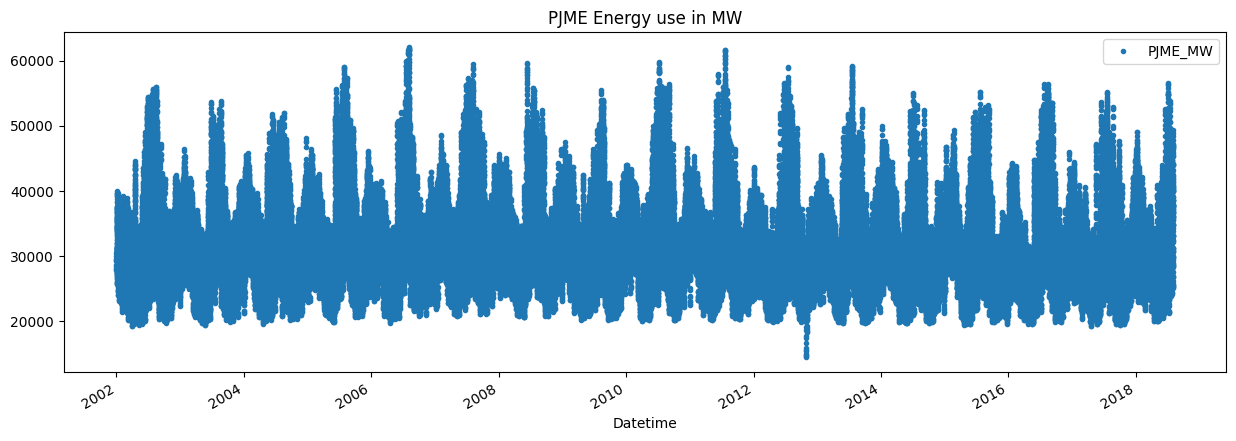

In [14]:
df.plot(style='.',figsize=(15,5),color=color_pal[0],title='PJME Energy use in MW')

Train/Test Split:

In [18]:
train = df.loc[df.index < '2015-01-01']
test = df.loc[df.index >= '2015-01-01']

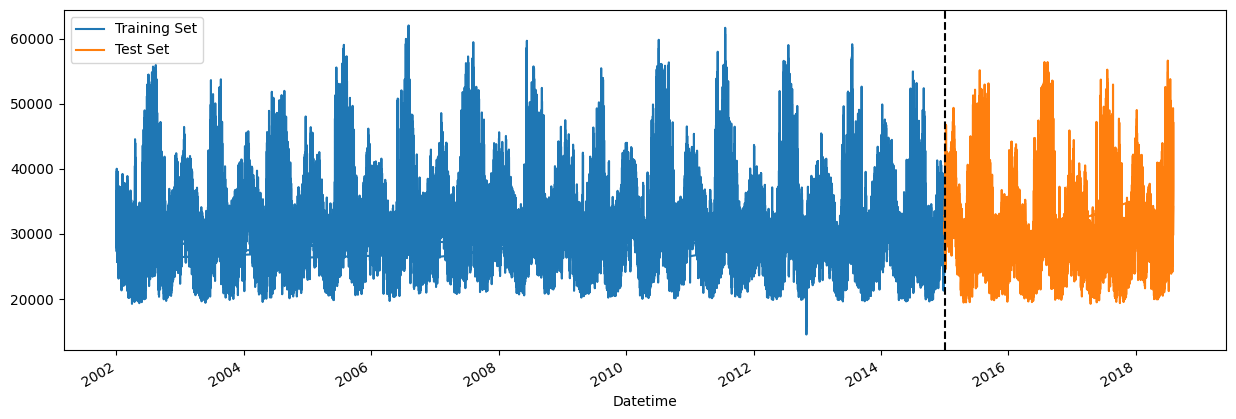

In [20]:
fig, ax = plt.subplots(figsize=(15,5))
train.plot(ax = ax, label='Training Set')
test.plot(ax=ax, label='Test Set')
ax.axvline('2015-01-01', color='black', ls='--')
ax.legend(['Training Set','Test Set'])
plt.show()

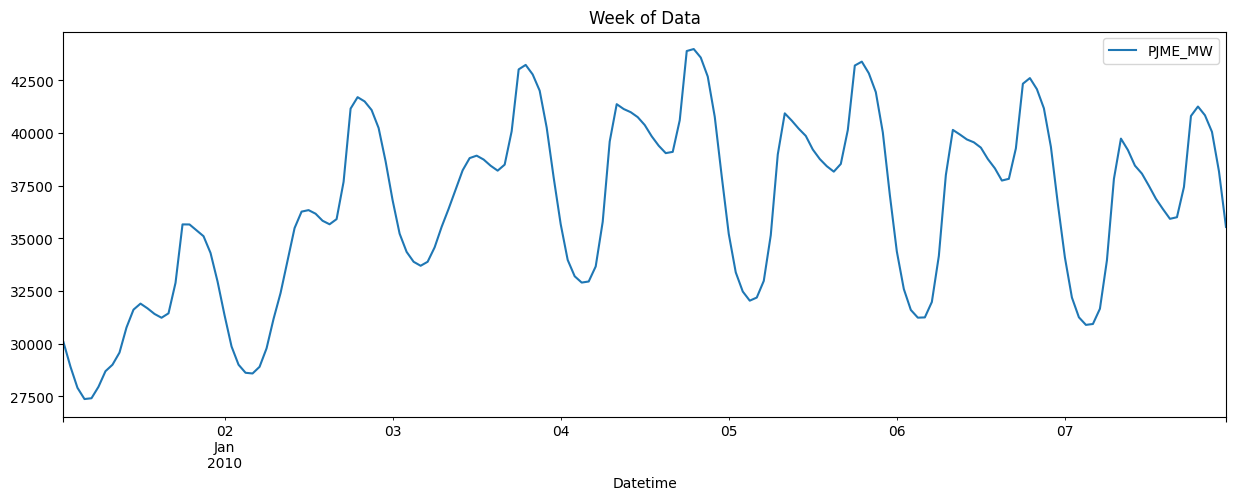

In [26]:
# plotting and visualising a week of data
df.loc[(df.index > '2010-01-01') & (df.index < '2010-01-08')].sort_index().plot(figsize=(15,5), title='Week of Data')
plt.show()

Feature Creation:

In [35]:
def create_features(df):
    """
        Create time series features based on time series index
    """
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    return df

In [30]:
df = create_features(df)

Visualize our feature/target relationship:

In [31]:
df

,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
Datetime,,,,,,,
2002-12-31 01:00:00,26498.0,1,1,4,12,2002,365
2002-12-31 02:00:00,25147.0,2,1,4,12,2002,365
2002-12-31 03:00:00,24574.0,3,1,4,12,2002,365
2002-12-31 04:00:00,24393.0,4,1,4,12,2002,365
2002-12-31 05:00:00,24860.0,5,1,4,12,2002,365
...,...,...,...,...,...,...,...
2018-01-01 20:00:00,44284.0,20,0,1,1,2018,1
2018-01-01 21:00:00,43751.0,21,0,1,1,2018,1
2018-01-01 22:00:00,42402.0,22,0,1,1,2018,1


Text(0.5, 1.0, 'MW by Hour')

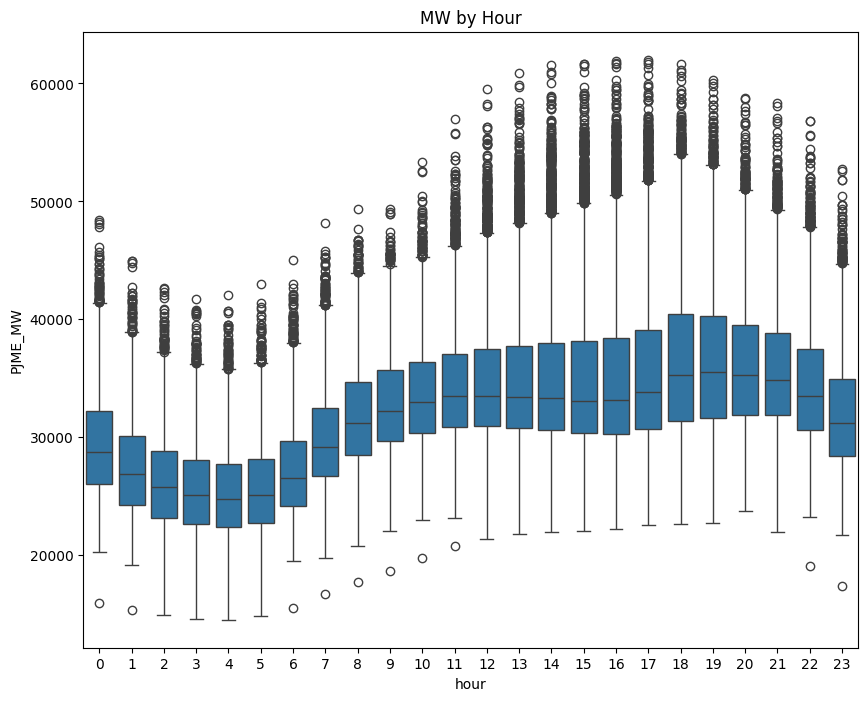

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x = 'hour', y='PJME_MW')
ax.set_title("MW by Hour")

Text(0.5, 1.0, 'MW by Month')

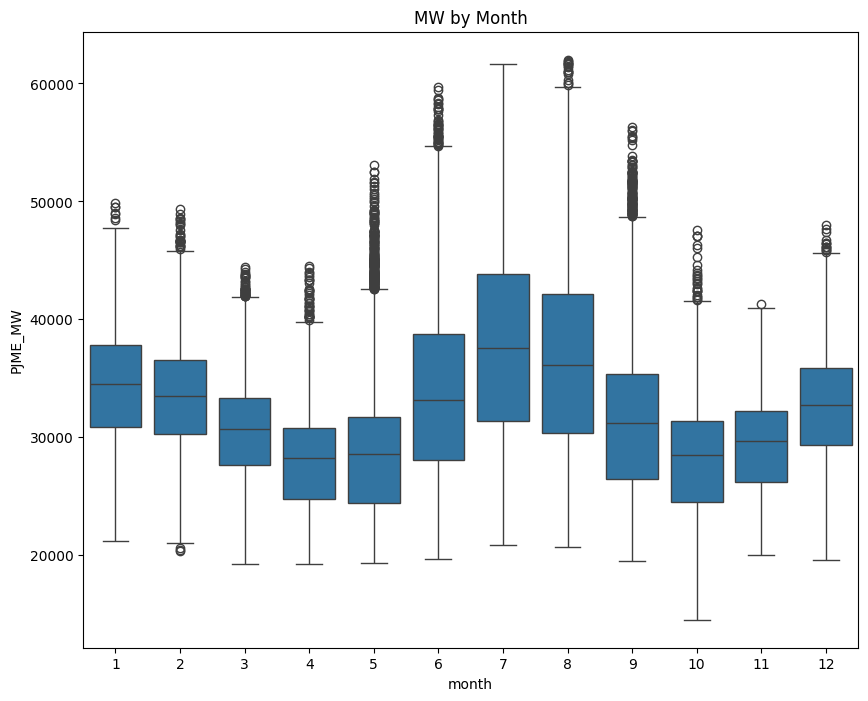

In [33]:
fig, ax = plt.subplots(figsize=(10,8))
sns.boxplot(data=df, x = 'month', y='PJME_MW')
ax.set_title("MW by Month")

Create our model:

In [36]:
train = create_features(train)
test = create_features(test)

In [37]:
df.columns

Index(['PJME_MW', 'hour', 'dayofweek', 'quarter', 'month', 'year',
       'dayofyear'],
      dtype='object')

In [38]:
FEATURES = ['hour', 'dayofweek', 'quarter', 'month', 'year','dayofyear']
TARGET = 'PJME_MW'

In [39]:
X_train = train[FEATURES]
y_train = train[TARGET]
X_test = test[FEATURES]
y_test = test[TARGET]

In [68]:
reg = xgb.XGBRegressor(n_estimators = 1000, early_stopping_rounds = 50, eta = 0.01)

In [69]:
reg.fit(X_train, y_train, 
        eval_set = [(X_train, y_train),(X_test, y_test)],
        verbose = True)

[0]	validation_0-rmse:6407.35736	validation_1-rmse:6479.81619
[1]	validation_0-rmse:6363.01592	validation_1-rmse:6438.46762
[2]	validation_0-rmse:6319.31204	validation_1-rmse:6397.84624
[3]	validation_0-rmse:6276.10095	validation_1-rmse:6358.15224


[4]	validation_0-rmse:6233.47267	validation_1-rmse:6319.19260
[5]	validation_0-rmse:6191.44103	validation_1-rmse:6281.02309
[6]	validation_0-rmse:6149.92226	validation_1-rmse:6243.13500
[7]	validation_0-rmse:6109.00344	validation_1-rmse:6206.10246
[8]	validation_0-rmse:6068.55090	validation_1-rmse:6168.76078
[9]	validation_0-rmse:6028.63852	validation_1-rmse:6132.63405
[10]	validation_0-rmse:5989.31481	validation_1-rmse:6096.99961
[11]	validation_0-rmse:5950.47167	validation_1-rmse:6061.95679
[12]	validation_0-rmse:5911.75590	validation_1-rmse:6027.04791
[13]	validation_0-rmse:5873.58600	validation_1-rmse:5992.93845
[14]	validation_0-rmse:5835.89024	validation_1-rmse:5959.05318
[15]	validation_0-rmse:5799.03022	validation_1-rmse:5926.17692
[16]	validation_0-rmse:5762.34004	validation_1-rmse:5893.08347
[17]	validation_0-rmse:5726.10890	validation_1-rmse:5860.80161
[18]	validation_0-rmse:5690.35544	validation_1-rmse:5828.49799
[19]	validation_0-rmse:5655.13460	validation_1-rmse:5797.1056

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=50,
             enable_categorical=False, eta=0.01, eval_metric=None,
             feature_types=None, feature_weights=None, gamma=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None, ...)

Feature Importance

In [70]:
reg.feature_importances_

array([0.46387812, 0.1620048 , 0.02888114, 0.20316096, 0.02382433,
       0.11825063], dtype=float32)

In [71]:
fi = pd.DataFrame(data = reg.feature_importances_,
                  index = reg.feature_names_in_,
                  columns = ['importance'])

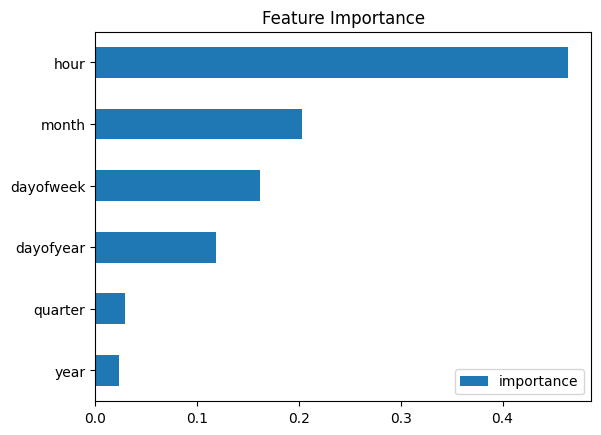

In [72]:
fi.sort_values('importance').plot(kind='barh', title='Feature Importance')
plt.show()

In [73]:
X_train.shape, y_train.shape

((113926, 6), (113926,))

Forecast on test set:

In [74]:
test['prediction'] = reg.predict(X_test)

In [78]:
df = df.merge(test['prediction'], how='left', left_index=True, right_index = True)

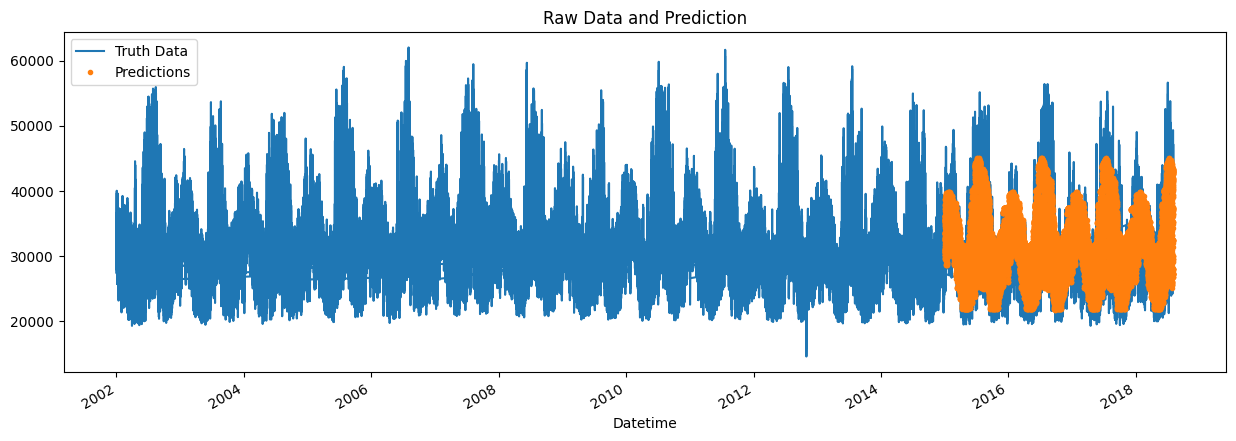

In [79]:
ax = df[['PJME_MW']].plot(figsize=(15,5))
df['prediction'].plot(ax=ax, style='.')
plt.legend(['Truth Data','Predictions'])
ax.set_title("Raw Data and Prediction")
plt.show()

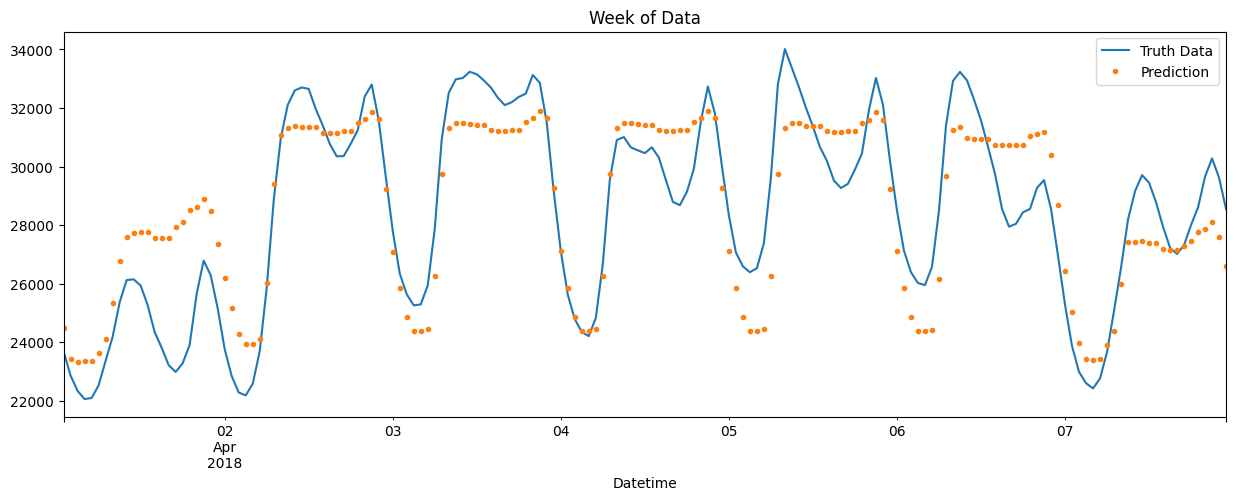

In [81]:
ax = df.loc[(df.index > '2018-04-01') & (df.index < '2018-04-08')]['PJME_MW'].sort_index().plot(figsize=(15,5), title='Week of Data')
df.loc[(df.index > '2018-04-01') & (df.index < '2018-04-08')]['prediction'].sort_index().plot(style='.')
plt.legend(['Truth Data','Prediction'])
plt.show()

In [82]:
np.sqrt(mean_squared_error(test['PJME_MW'], test['prediction']))

3741.030178837441

Calculate Error:

In [83]:
test['error'] = np.abs(test[TARGET] - test['prediction'])

In [84]:
# look at the worst and best predicted days

In [ ]:
test['date'] = 